# ANN User Guide

In this notebook we will be using an training an ANN on single point fluorescent spectra (ex: 290, 350) to determine how adulterated maple samples are and with what adulterant (corn, rice, or beet). This can be generalized to many types of similar classifcaiton problems. 

### Preprocessing the Data:

1. Copy the OPJ data into an Excel spreadsheet at your desired interval (every 5th, 10th excitation wavelength, with the excitation wavelength labels (features) occupying the first row and sample names (class labels) occupying the first column. 
2. If desired, you may create replicates by adding an established amount of noise to the samples. 
       One possibly formula is: 
        M = maximum intensity
        m = minimum intensity
        A = noise amplitude possible with .01 noise = (M-m)*(.01)
        k = a random real number between 0 and 1
        For each excitation intensity:
        
[Click for Equation](https://drive.google.com/file/d/12XKIn57y5oXnZ94C0pM6UQCBOsneb_Ua/view?usp=share_link)

3. Save this file as a csv, not as an xlsx file. 

#### Before Any Coding: 

The first step is to download [Python 3](https://www.python.org/downloads/) from your browser (as you would any internet application) and the most recent relevant software downloaded to your computer. None of this will run on Python 2. If you are feeling unsure, there are dozens of step, by step walkthroughs of the installation process, like [this one](https://realpython.com/installing-python/) for example. 

Once you have this completed, you can install any specific packages you might need. You can see what versions of packages you have by typing "pip list" into "Command Prompt" or any command line interface. Download a relevant package, X, by typing "pip install X". 

Ex: "pip install jupyter" will install jupyter will install jupyter and a few affiliated packages. 

Once you have downloaded the necessary packages, you must pick an IDE, an integrated development environment, which is where you will write, run, and de-bug your code. There are many free ones to choose from, to name a few: Jupyter, Spyder, Atom, Sublime. A simple Google search will help you pick one out. Download it. 

Now you are ready to load your libraries and begin running some code. When you see, for example, "import numpy as np", it means you are importing the numpy library as the nickname, "np." This means that when you want to use something from numpy, you need only to refer to it as "np." When you see, "from tensorflow import keras," it means that you are importing a sublibrary of tensorflow, "keras."

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import scipy as sp
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

First, load and read some of the data from a .csv. Remember that you __must__ explicitly save a file from Excel as a csv, or else it will just save to .xlsx. It is best practice to include the entire path of the file you are reading, and to place "r" before the filepath, to ensure that the slashes within the path are read correctly. Alternatively, you could use forward slashes instead of backslashes. 

ex: 
r"C:\Users\maiaz\Desktop\Corradini Lab\All Maple Every 5 (ex290350).csv"

C:/Users/maiaz/Desktop/Corradini Lab/All Maple Every 5 (ex290350).csv"

The features are the excitation wavelengths in nanometers, the columns. The samples are the rows. The very first column represents the type of syrup, adulterant and how much, ie. the sample labels. The very first row is the names of the features, which is just the excitation wavelengths. When you import the data, set header=0 to set the first row as labels. If you do not wish to set the first row as the label row, then simply do not identify any header.

The labeling schema is as follows:

AmBD1 is Amber, Beet Dilute, 1%

DrCD2 is Dark, Corn Dilute, 2%

DrRD5 is Dark, Rice Dilute, 20%

Notice that 1-1%, 2-2%, 3-5%, 4-10%, 5-20%, 6-50%.

For CoLab users, they may upload the data to their Google Drive and then reference the file directly without in-code uploading necessary. To achieve this, the user simply mounts (connects) their Google Drive to the notebook. 

As an example to start off, you can access a some datasets [here](https://drive.google.com/drive/folders/1U_zpTY-0uVXDiznQUHqSf30BLDHbfjdN?usp=sharing). Simply download a copy of the ANN dataset that you wish to work with to your own drive for the next steps. 

Next, you will mount (connect) your entire drive, where your copy of the ANN dataset lives, to the CoLab notebook. "drive.mount(/content/drive/)" will cause an authorization window to appear, where you will log-in to approve the connection. Once you have completed this, you may click the folder in the menu bar on the upper left-hand side of the screen. Here you will see a list of all the files within "MyDrive." You should navigate to wherever your stored you data.

[Click here for a visual on what your directory should look like.](https://drive.google.com/file/d/1KCAa5WsioKoJhJ_pLUnq6Jl-NVSluYrk/view?usp=sharing)

Once you have found it, you must upload that specfic csv file into the notebook. Right click on the file within your directory, and click "Copy path." Then you can paste that path into where you are assigning "Data" below. 

Set the X data and y labels by assigning the first column to be "y_data" and all other columns to be "X_data" using [Dataframe.iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

In [2]:
#Read data and create training and testing sets
Data=pd.read_csv(r"C:\Users\maiaz\Desktop\Corradini Lab\All Maple Every 5 (ex290350).csv",header=0)
X_data=Data.iloc[:,1:].values
y_data=Data.iloc[:,0].values

#Display the first 5 rows of the uploaded dataframe.
Data.head()

,Unnamed: 0,310,315,320,325,330,335,340,345,350,...,505.1,510.1,515.1,520.1,525.1,530.1,535.1,540.1,545.1,550.1
0,AmBD1,57020.0,65640.0,90500.0,89310.0,79990.0,82840.0,89860.0,93300.0,98220.0,...,91710.0,84230.0,77860.0,68760.0,63580.0,58170.0,51740.0,46200.0,41440.0,36770.0
1,AmBD1,56990.0,65480.0,90020.0,89690.0,79380.0,83210.0,88720.0,94530.0,100650.0,...,91140.0,84830.0,77220.0,69990.0,64600.0,57250.0,50950.0,45990.0,42210.0,36430.0
2,AmBD1,58160.0,66530.0,90710.0,90390.0,79340.0,83490.0,88730.0,94700.0,100640.0,...,91100.0,82010.0,75950.0,70020.0,62960.0,56830.0,50960.0,46040.0,42220.0,35990.0
3,AmBD1,58490.0,67950.0,92620.0,90050.0,81250.0,83680.0,89110.0,92760.0,98720.0,...,89480.0,83580.0,76620.0,70600.0,63280.0,56670.0,50120.0,47130.0,41840.0,36740.0
4,AmBD1,58030.0,66520.0,92030.0,88400.0,79790.0,83810.0,88340.0,91550.0,98610.0,...,90720.0,84260.0,76070.0,69310.0,62530.0,56450.0,51050.0,46610.0,41260.0,36340.0


To save time later, we will create a list, called "classlist" of all possibile classes (without repetition). We create an empty list and append any classes not yet within the list. This is simply for presentation's sake, when we want to display the results in a palatable way. It has nothing to do with the actual ANN. 

In [3]:
classlist=list()
for x in y_data:
    if x not in classlist: 
        classlist.append(x)  

Before going any further, we must split the data into training and testing sets with [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). It is imperitive to do this before fitting the model because we want to ensure that the model does __not__ see the test set until the very end. In this instance, we opt for a 25/75 split, that is 25% of the data is for testing and 75% is training. "stratify" means that we are maintaining the same class ratio between the full dataset and the train/test splits. This should only be used when you have relatively balanced classes. The data is shuffled and the class labels of the testing set are saved to "y_test_realnames" for the confusion matrix later. It is important to notes that the order in which you list the data to be split makes a significant difference. It is always helpful to display/print your dataset out afterwards (and at any point) if you have any doubts. 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, shuffle= True, stratify=y_data)
y_test_realnames=y_test

The class names are "one-hot encoded" for both the testing and training set. We must "one-hot encode" the classes because A. the ANN cannot read or accept text labels for classes B. One-hot encoding prevents weighting one class over another (ie: With classes as a matrix of “1”s and “0”s, each row sums to “1”. With classes as a vector [1,22], 22>21>...>2>1.). Here is a simple example below.

[Click for Example](https://drive.google.com/file/d/1R89oHYZvUUUpt3TrElZVceMKqmOgSq_i/view?usp=share_link)

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
from tensorflow.keras.utils import to_categorical
y_train=(to_categorical(y_train))
y_test=(to_categorical(y_test))

There is a wide range of fluorescent intensity between samples (rows). We don't want the model to favor some classes over others simply because that class has bigger numbers in its features. We also want to capture how the intensities change (the ratio) moreso than the values of the intensities themselves. Thus, we write a function that will row normalize the entire dataset, sample by sample. It is important to note that we are __not__ column normalizing. More information on the norm taken can be found within the [scipy norm documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html).

In [6]:
#feature scaling
def rownorm(x):
    """Normalize each row of the matrix
    Argument: x - an (n,m) matrix
    Return: x - row normalized (n,m) matrix"""
    
    x_norm = sp.linalg.norm(x, ord=2, axis=1, keepdims=True)
    x= x/x_norm
    return x

#Apply our new rownorm function to the X sets.
X_train = rownorm(X_train)
X_test = rownorm(X_test)

The training data is then split into validation and the training sets with a 25/75 split. The validation set serves as a benchmark for the training set to validate with at the end of each epoch. This is not to be confused with the testing set as the model does "see" the validation set throughout training  but does not see the testing set until final model evaluation.

In [7]:
X_train_2, X_valid, y_train_2, y_valid = train_test_split(X_train, y_train, test_size=0.25, shuffle= True, stratify=y_train)

The model is built. Here are some brief definitions to refer to:

#### “Sequential Model”
- Top-down stack of layers where each layer has one input and one output tensor.
- Basic model suitable for most classification problems

#### “Dense Layer”
- A layer that is deeply connected to its previous layer
- output = activation(dot(input, kernel) + bias)
 - activation is the activation function defined
 - dot is the numpy dot product
 - input is input data
 - kernel is the weight data for that layer.
 - bias is the bias value added

#### “Dropout”
- Layer used to fight overfitting
- The layer randomly sets inputs to 0 at a chosen rate (ie: .2).
- All inputs not set to 0 are scaled up by 1 so that the sum of all inputs doesn’t change.

#### “ReLu”
- Short for Rectified Linear Activation Function
- Transforms the summed input weight into the output as such:
 - If input is positive: It will output the original input
 - If input is negative or 0: It will output 0
- Benefits: 
 - Computationally cheap
 - Acts linearly for half the data, so it’s desirable for optimizing NNs
 
#### “Softmax”
 - Elements of the output are in the range of (0,1) summing to 1
 - Results are probability distribution for multiclass classification.
 - "Softmax" is typical for multiclass classification problems, while "Sigmoid" is standard for binary classification problems

#### Optimizer = “Adam”
- Optimizer changes weights and ANN attributes according the “Adam” algorithm
- Adam stands for Adaptive Moment Estimation
- Is an extension of stochastic gradient descent and an update of RMSProp
 - The algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.
- Also standard recommended by tensorflow

#### Loss = “categorical_crossentropy” 
- Takes outputs probabilities from Softmax and measures their distance from the truth values. 
- Goal is for this distance to be as small as possible (ie: minimizing the loss)
- Penalizes the probability based on how far it is from truth using a logarithmic scale, so closer to 0 means less penalty and closer to 1 means greater penalty.  

#### “Param #”
- Represents the number of learnable elements in each layer. It can be written as: 

    (Output_Shape) x (Output_Shape_of_Previous_Layer) + 1
    
    Where 1 is a bias neuron added to provide the model added flexibility to better fit the data.

#### "Epochs" 
- number of training runs

#### "Units" 
- Another word for nodes/neurons 
- Contains one activation input and output. 
- In the case of the ANN for maple syrups, because there are so many trainable parameters, the number of nodes decreases with each layer. 

#### "EarlyStopping"
- Designed to prevent overfitting.
- Will stop training when a certain set criteria has been met. 
- Example:
 - ‘monitor=’val_loss’’ means that the criteria is the validation loss.
 - ‘patience = 25’ indicates that if the monitor doesn’t improve within at least every 25 epochs, training will stop. 

#### "batch_size"
- The number of samples trained in each epoch.

The input layer has as many units as there are columns (features). For the output, "softmax" is used because it is a multi-class classification problem and the number of nodes corresponds with the number of classes. The number hidden layers (in this case just one) and its units (aside from the first and last) are decided by just playing around with the numbers.  You can see that the hidden layer has 56 units, which is roughly in between the number of input and output nodes. The values for "EarlyStopping" and "batch_size" are also set by a process of trial and error. 

It is important to reinforce that the number of nodes in the input and output layers depends __solely__ on the dataset at hand. If you have _X_ features, there will be _X_ input nodes, if you have _Y_ classes, you will have _Y_ output nodes. 

I encourage you to examine the Keras API documentation to discover more specifics about the elements used in model building. Each model may have different needs.

In [8]:
#Building the model
ann=tf.keras.models.Sequential()
#Adding input layer
ann.add(tf.keras.layers.Dense(units=86,activation="relu"))
#Adding Hidden Layer
ann.add(tf.keras.layers.Dense(units=56,activation="relu"))
#Output layer
ann.add(tf.keras.layers.Dense(units=41,activation="softmax"))
#Compiling ANN
ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
#Configure early stopping to prevent overfit 
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

After having built the model, we must fit it to the data at hand. We set the x (actual features) and y (class labels) data and a batch size. Although it's set to 1000 epochs, it never reaches even close due to "early stopping".

In [9]:
#Fitting ANN
history=ann.fit(x=X_train_2, y=y_train_2, batch_size=40, epochs=1000, validation_data=(X_valid, y_valid), callbacks=[es])

Epoch 1/1000
12/12 [==============================] - 8s 180ms/step - loss: 3.7134 - accuracy: 0.0296 - val_loss: 3.7058 - val_accuracy: 0.0759
Epoch 2/1000
12/12 [==============================] - 0s 38ms/step - loss: 3.7026 - accuracy: 0.0761 - val_loss: 3.6992 - val_accuracy: 0.0633
Epoch 3/1000
12/12 [==============================] - 0s 38ms/step - loss: 3.6929 - accuracy: 0.0782 - val_loss: 3.6889 - val_accuracy: 0.0759
Epoch 4/1000
12/12 [==============================] - 0s 39ms/step - loss: 3.6804 - accuracy: 0.0803 - val_loss: 3.6739 - val_accuracy: 0.0759
Epoch 5/1000
12/12 [==============================] - 0s 36ms/step - loss: 3.6623 - accuracy: 0.0973 - val_loss: 3.6515 - val_accuracy: 0.1139
Epoch 6/1000
12/12 [==============================] - 0s 37ms/step - loss: 3.6320 - accuracy: 0.1078 - val_loss: 3.6174 - val_accuracy: 0.1076
Epoch 7/1000
12/12 [==============================] - 0s 39ms/step - loss: 3.5879 - accuracy: 0.1205 - val_loss: 3.5644 - val_accuracy: 0.132

Epoch 58/1000
12/12 [==============================] - 1s 64ms/step - loss: 1.5522 - accuracy: 0.5793 - val_loss: 1.5982 - val_accuracy: 0.5570
Epoch 59/1000
12/12 [==============================] - 1s 46ms/step - loss: 1.5441 - accuracy: 0.5370 - val_loss: 1.5770 - val_accuracy: 0.5759
Epoch 60/1000
12/12 [==============================] - 1s 44ms/step - loss: 1.5306 - accuracy: 0.5497 - val_loss: 1.5665 - val_accuracy: 0.6582
Epoch 61/1000
12/12 [==============================] - 1s 57ms/step - loss: 1.5128 - accuracy: 0.5687 - val_loss: 1.5514 - val_accuracy: 0.6013
Epoch 62/1000
12/12 [==============================] - 1s 81ms/step - loss: 1.4893 - accuracy: 0.5920 - val_loss: 1.5374 - val_accuracy: 0.6203
Epoch 63/1000
12/12 [==============================] - 1s 60ms/step - loss: 1.4745 - accuracy: 0.6110 - val_loss: 1.5208 - val_accuracy: 0.6772
Epoch 64/1000
12/12 [==============================] - 0s 38ms/step - loss: 1.4691 - accuracy: 0.6025 - val_loss: 1.5140 - val_accuracy:

Epoch 115/1000
12/12 [==============================] - 1s 45ms/step - loss: 1.0684 - accuracy: 0.6934 - val_loss: 1.2185 - val_accuracy: 0.7025
Epoch 116/1000
12/12 [==============================] - 1s 44ms/step - loss: 1.0643 - accuracy: 0.6871 - val_loss: 1.2268 - val_accuracy: 0.6709
Epoch 117/1000
12/12 [==============================] - 0s 39ms/step - loss: 1.0628 - accuracy: 0.6956 - val_loss: 1.2127 - val_accuracy: 0.6772
Epoch 118/1000
12/12 [==============================] - 0s 42ms/step - loss: 1.0541 - accuracy: 0.6744 - val_loss: 1.2179 - val_accuracy: 0.7089
Epoch 119/1000
12/12 [==============================] - 0s 42ms/step - loss: 1.0543 - accuracy: 0.6702 - val_loss: 1.2129 - val_accuracy: 0.6962
Epoch 120/1000
12/12 [==============================] - 0s 44ms/step - loss: 1.0448 - accuracy: 0.6977 - val_loss: 1.2009 - val_accuracy: 0.6582
Epoch 121/1000
12/12 [==============================] - 0s 41ms/step - loss: 1.0360 - accuracy: 0.6744 - val_loss: 1.2060 - val_ac

12/12 [==============================] - 0s 38ms/step - loss: 0.7416 - accuracy: 0.7632 - val_loss: 1.1169 - val_accuracy: 0.7405
Epoch 228/1000
12/12 [==============================] - 0s 38ms/step - loss: 0.7261 - accuracy: 0.7738 - val_loss: 1.1301 - val_accuracy: 0.7278
Epoch 229/1000
12/12 [==============================] - 0s 37ms/step - loss: 0.7230 - accuracy: 0.7653 - val_loss: 1.1151 - val_accuracy: 0.7658
Epoch 230/1000
12/12 [==============================] - 0s 38ms/step - loss: 0.7315 - accuracy: 0.7780 - val_loss: 1.1264 - val_accuracy: 0.7468
Epoch 231/1000
12/12 [==============================] - 0s 39ms/step - loss: 0.7432 - accuracy: 0.7548 - val_loss: 1.1147 - val_accuracy: 0.7785
Epoch 232/1000
12/12 [==============================] - 0s 40ms/step - loss: 0.7241 - accuracy: 0.7738 - val_loss: 1.1359 - val_accuracy: 0.7405
Epoch 233/1000
12/12 [==============================] - 0s 38ms/step - loss: 0.7295 - accuracy: 0.7590 - val_loss: 1.1160 - val_accuracy: 0.7785


After training, we print the training and testing accuracy and plotting the losses of the validation and training datasets against each other. We like what we see below because there are not too many sudden jumps and the train, validation seem to follow a similar trajectory.

7/7 [==============================] - 0s 15ms/step - loss: 1.0670 - accuracy: 0.7346
Training Accuracy: 0.783
Testing Accuracy: 0.735


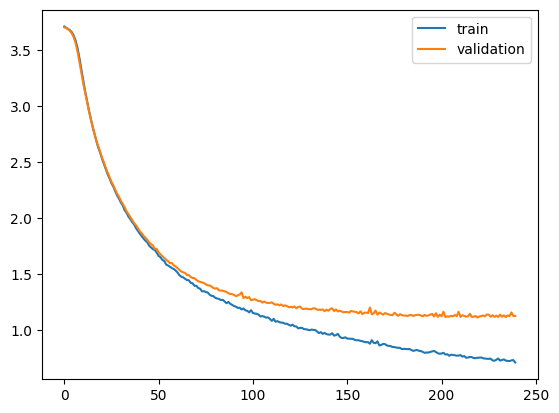

In [10]:
#Setting train and test accuracies to the second output of ann.evaluate.
_,train_acc = ann.evaluate(X_train, y_train)
_,test_acc = ann.evaluate(X_test, y_test)
#rounding the above accuracies to 3 decimal places
train_acc=str(round(train_acc, 3))
test_acc=str(round(test_acc, 3))
print("Training Accuracy: "+train_acc)
print("Testing Accuracy: "+test_acc)
#plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

Just a summary of the ANN architecture. The output shape is (None, X). The first dimension (in this case "None") is typically the batch size. Because the batch size is not something inherent to this model, ie. it is variable, the value is set to "None". The second dimension is simply the output size that we decided when constructing the model.

In [11]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 86)                7482      
                                                                 
 dense_1 (Dense)             (None, 56)                4872      
                                                                 
 dense_2 (Dense)             (None, 41)                2337      
                                                                 
Total params: 14,691
Trainable params: 14,691
Non-trainable params: 0
_________________________________________________________________


This is an attempt to display the ANN's top picks when it evaluated the testing set. It's important to include this because we can see where it's getting confused and with what certainty it's deciding. Warning: It's not pretty to look at, especially if you are examining a large set. 

7/7 [==============================] - 0s 1ms/step


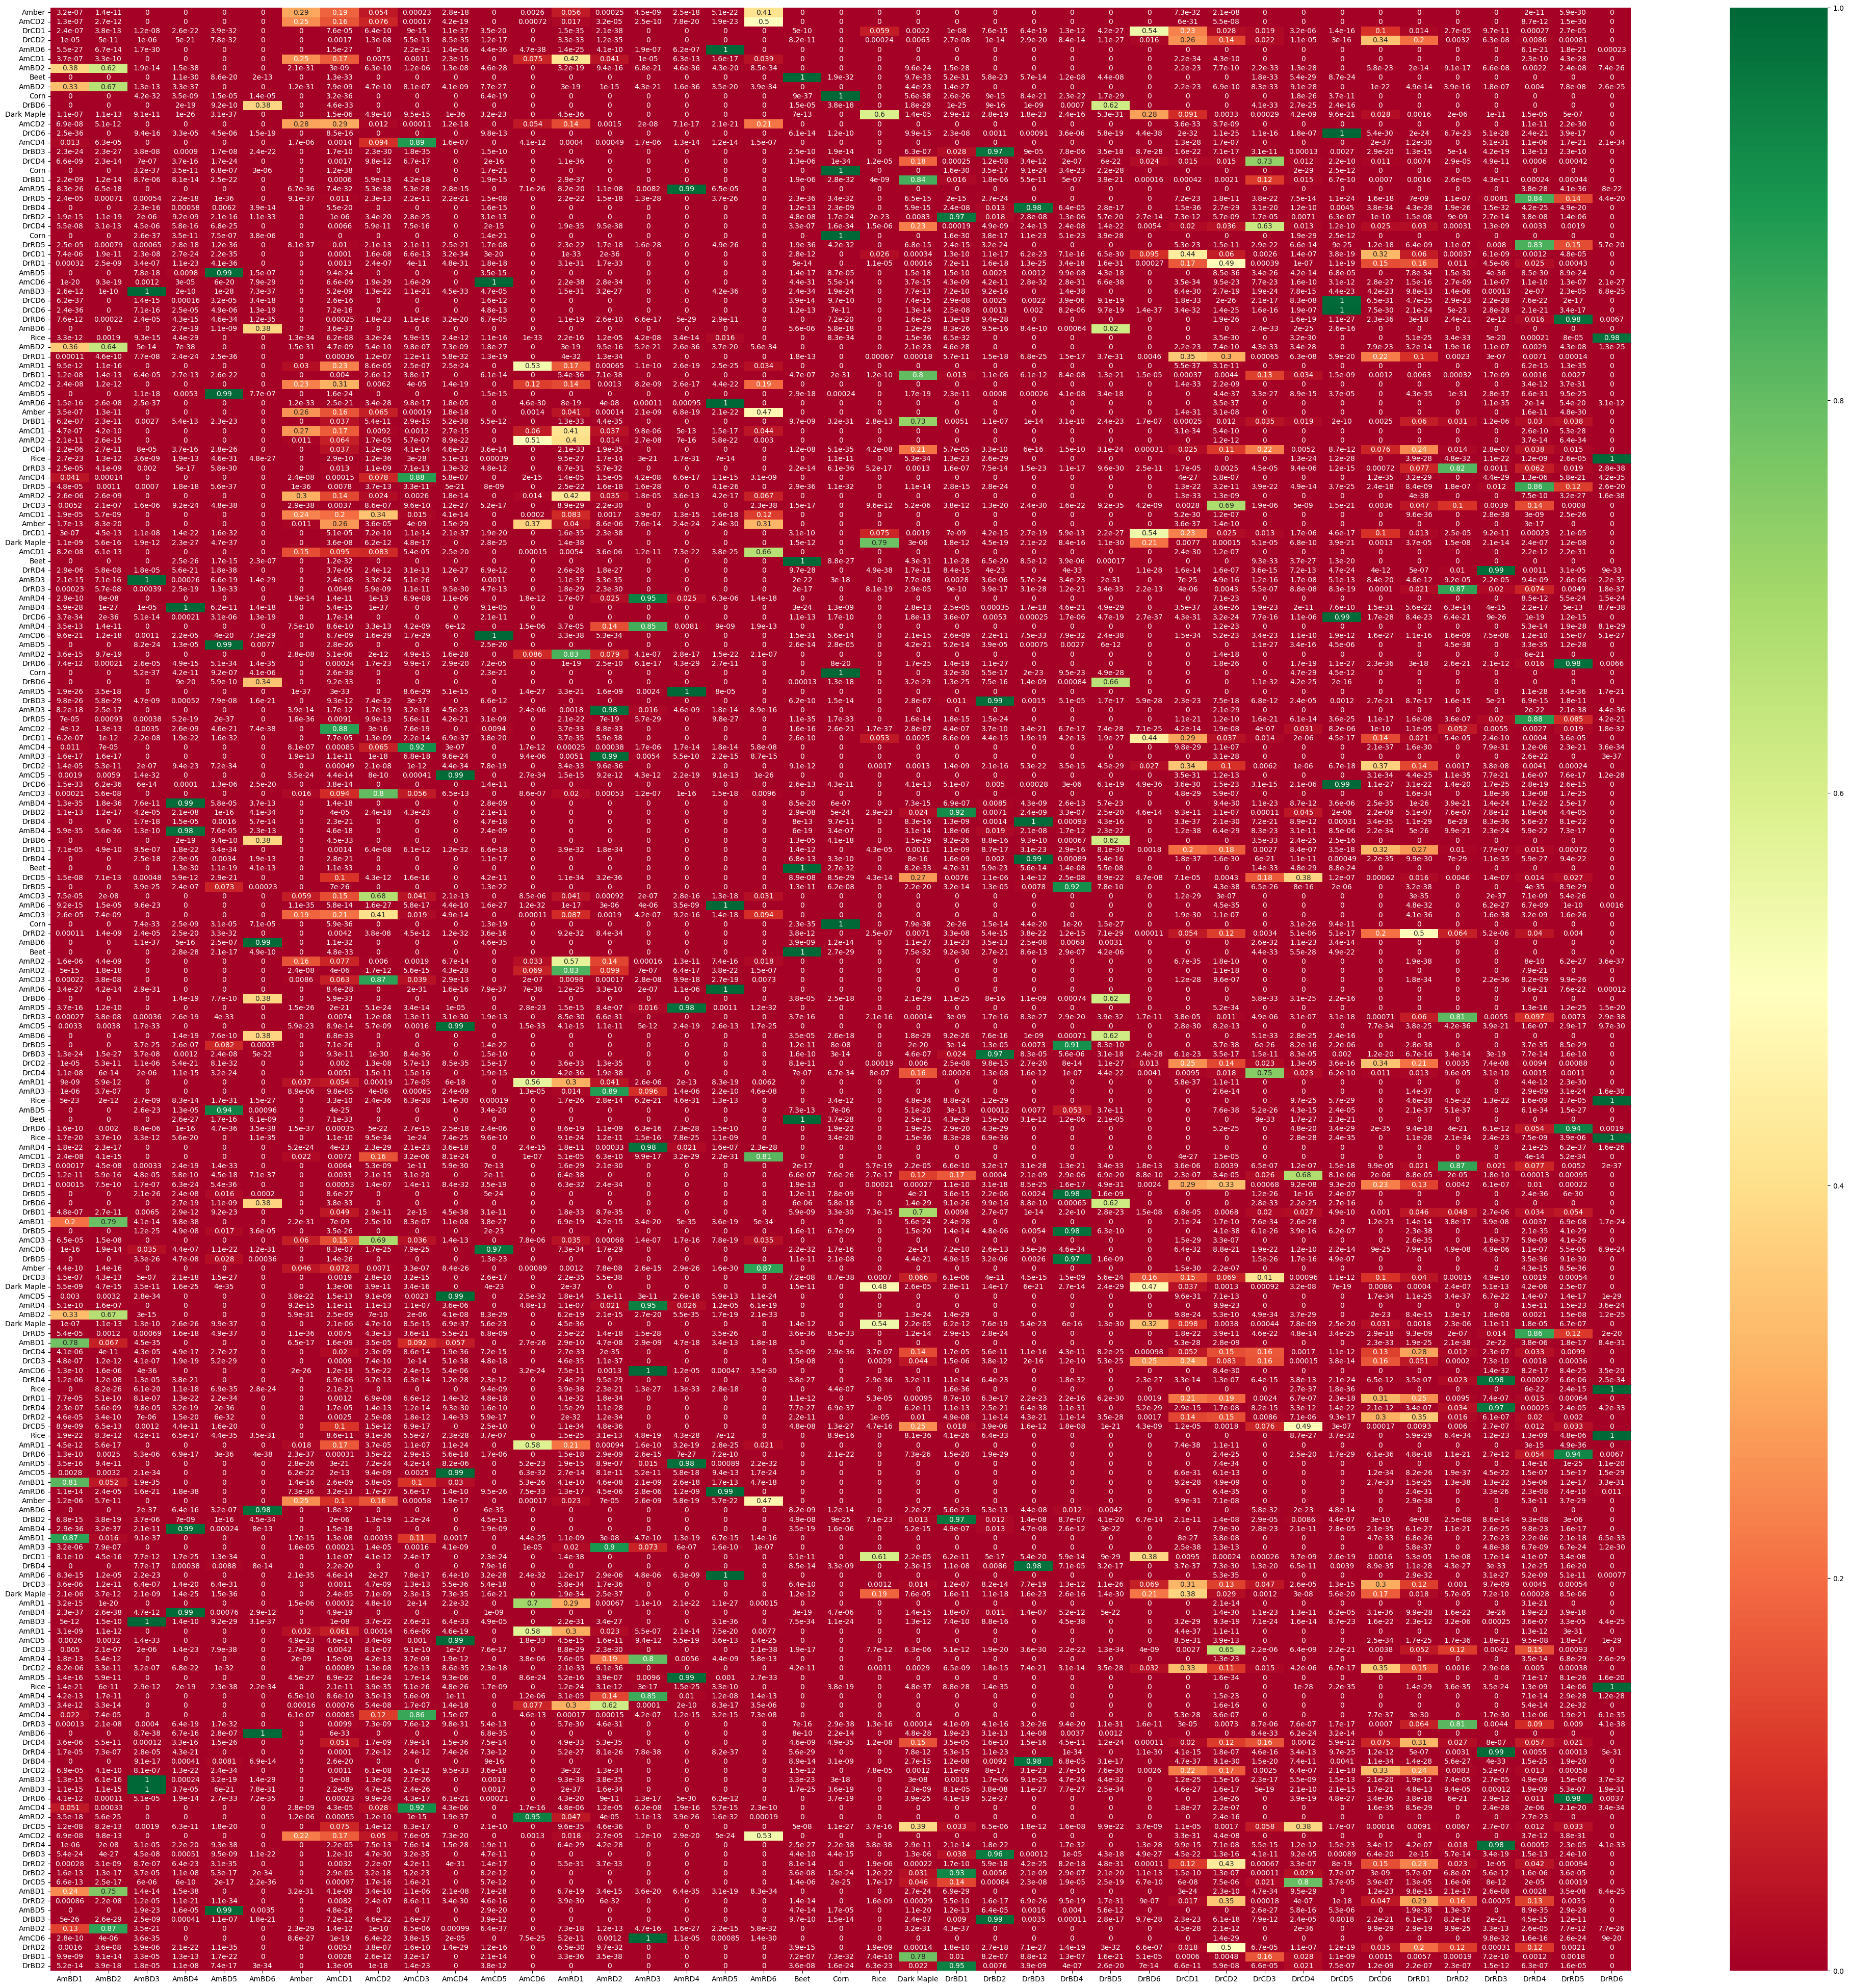

In [12]:
#plot predicted against real values
pred=ann.predict(X_test)
pred=np.asarray(pred)

#Make heatmap of classifcation predictions 
#create list of labels: ie turn the 1d nparray into a list
y_labels=y_test_realnames.tolist()
X_labels=classlist
plt.figure(figsize=(50,50))
#plot heat map
m=sns.heatmap(pred, annot=True, cmap="RdYlGn", xticklabels=X_labels, yticklabels=y_labels)
plt.show(m)


We can also display the results as a confusion matrix which is easier on the eyes. 

7/7 [==============================] - 1s 8ms/step


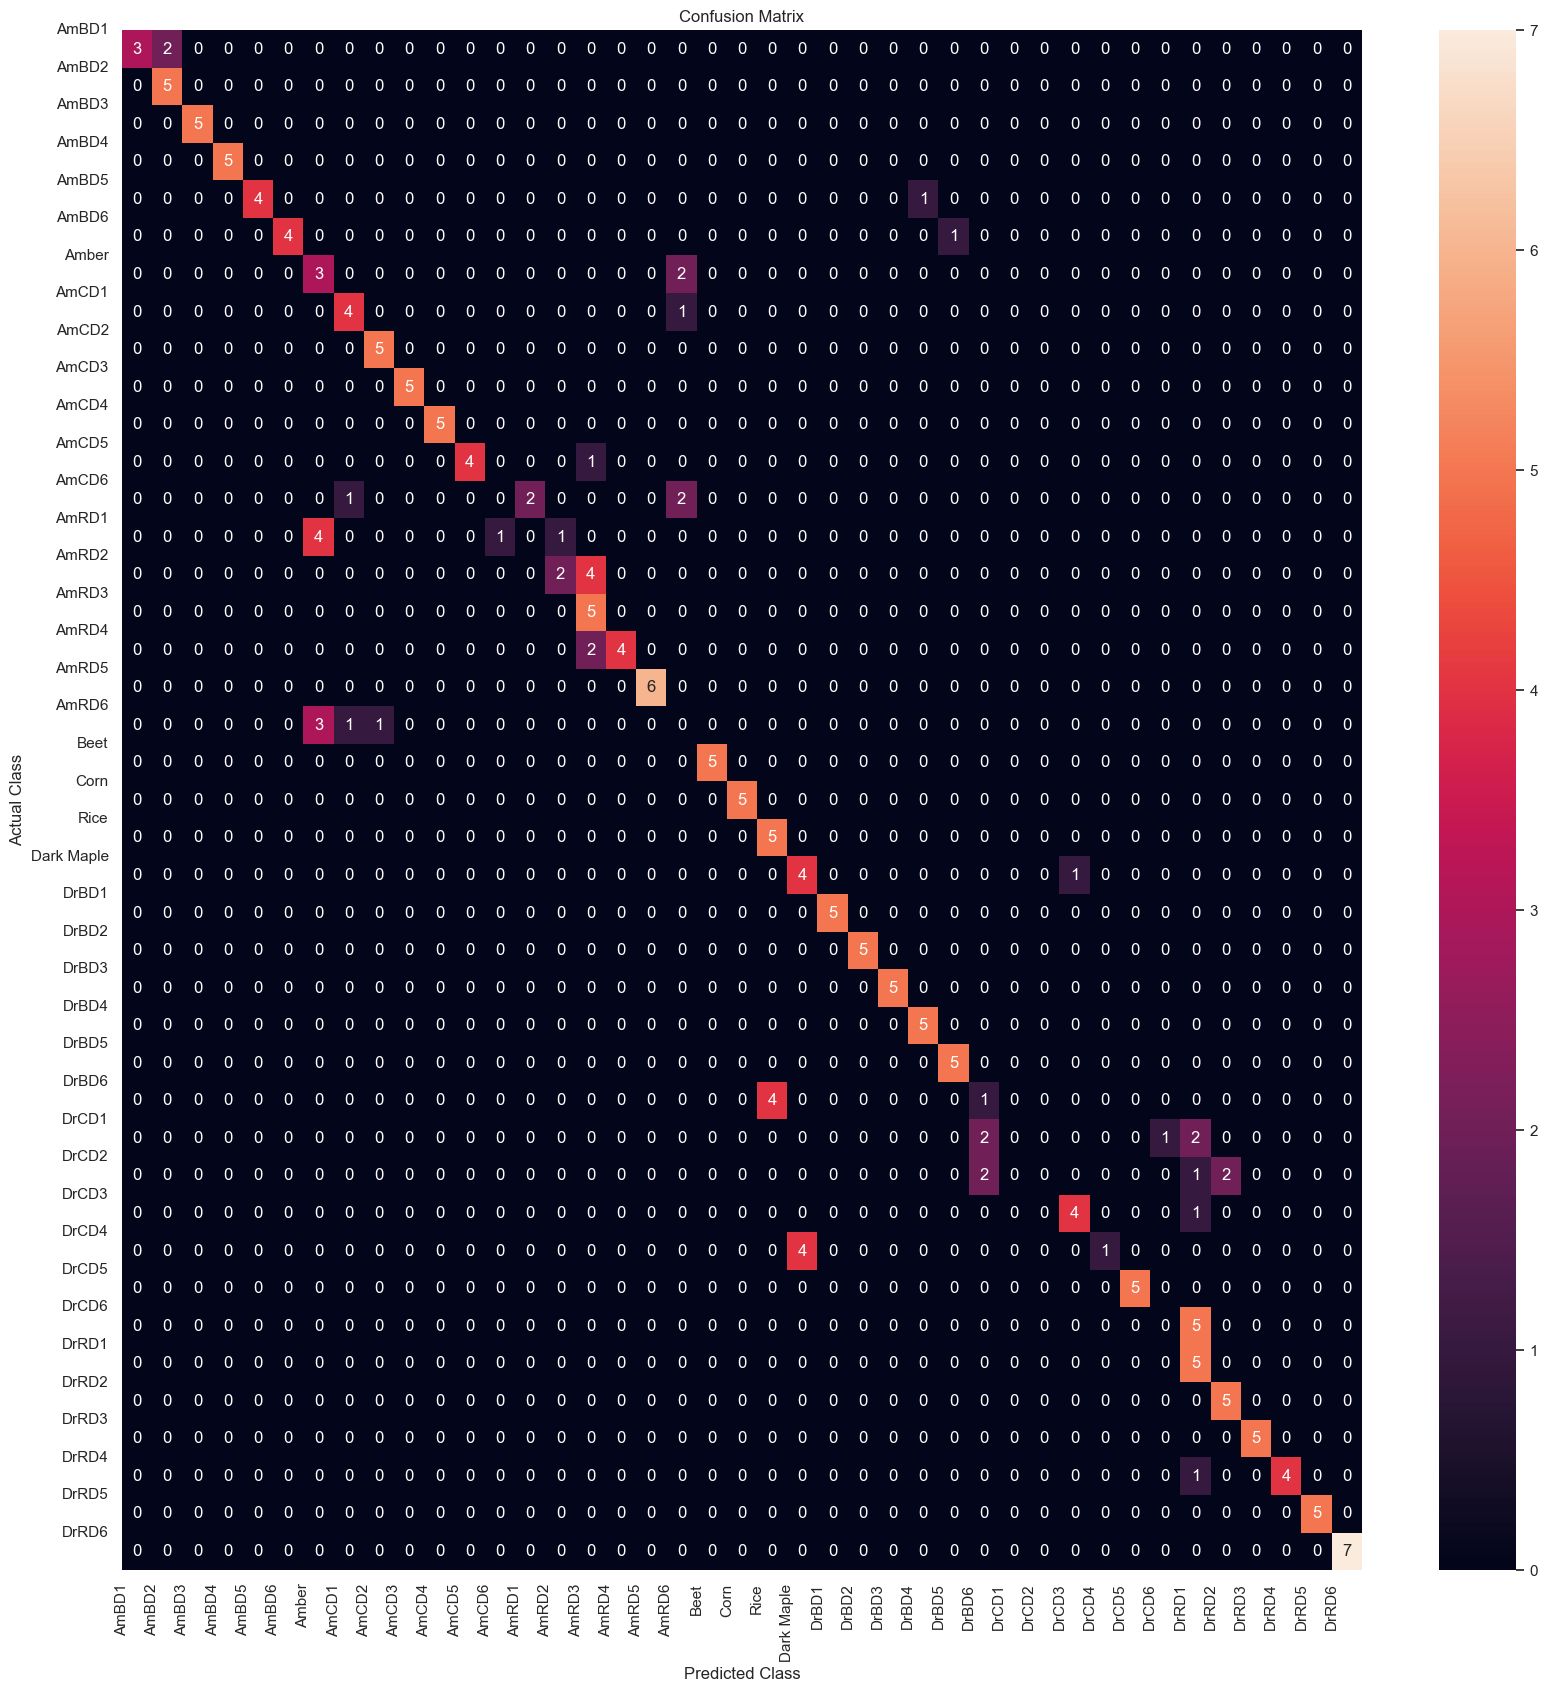

In [12]:
#plot predicted against real values
pred=ann.predict(X_test)
pred=np.asarray(pred)
predictions=np.argmax(pred,axis=1)
#create list of labels: ie turnthe 1d nparray into a list
y_rounded_labels=np.argmax(y_test, axis=1)
X_labels=classlist
num_ticks=list(range(len(X_labels)))
y_labels=y_test_realnames.tolist()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_rounded_labels, predictions)
sns.set(font_scale=1) # Adjust to fit
fig, ax = plt.subplots(figsize=(20,20))  
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('Actual Class')
ax.set_xticks(num_ticks)
ax.set_yticks(num_ticks)
ax.xaxis.set_ticklabels(X_labels);
ax.tick_params(axis='x', rotation=90)
#Perhaps a bug, but the confusion matrix wouldn't display 
#the labels properly without the x-axis labels rotation set to 360 degrees.
ax.tick_params(axis='y', rotation=360)
ax.yaxis.set_ticklabels(X_labels);

Saving the model.

In [ ]:
from keras.models import load_model
ann.save('Amber Maple Model 09-28-22')  # creates a HDF5 file
del ann  # deletes the existing model